### Question 1: Si Wu, journalism, second year graduate student; Yukuang Zhang, data science, first year graduate student; Xubo Tang, data science, first year graduate student; Amel Nestor Docena, data science, first year graduate student.

## Question 2

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn import linear_model
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [2]:
data_HW3=pd.read_csv("Credit.csv")

## Question 2a – Select the training set

In [3]:
randomly_organized=data_HW3.sample(frac=1)

In [4]:
train_set = randomly_organized[0:200]
devel_set = randomly_organized[200:300]
valid_set = randomly_organized[300:400]

## Question 2b – data exploration

Text(0.5,0,'Income')

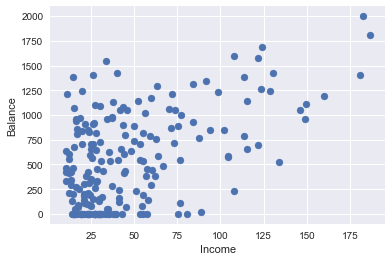

In [563]:
plt.scatter(train_set['Income'],train_set['Balance'])
plt.ylabel('Balance')
plt.xlabel('Income')

Text(0.5,0,'Limit')

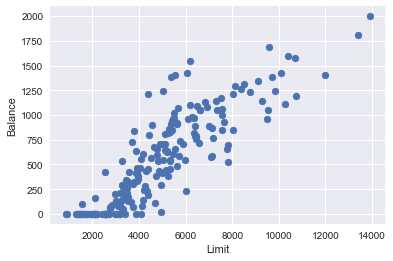

In [564]:
plt.scatter(train_set['Limit'],train_set['Balance'])
plt.ylabel('Balance')
plt.xlabel('Limit')

Text(0.5,0,'Rating')

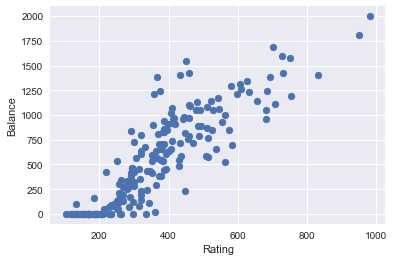

In [565]:
plt.scatter(train_set['Rating'],train_set['Balance'])
plt.ylabel('Balance')
plt.xlabel('Rating')

Text(0,0.5,'Balance')

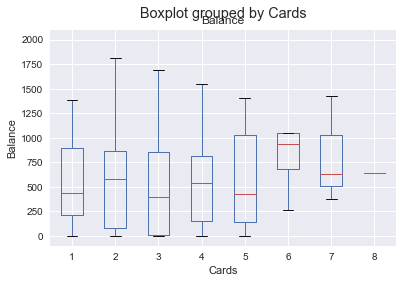

In [566]:
train_set.boxplot(column='Balance', by='Cards')
plt.ylabel('Balance')

Text(0.5,0,'Age')

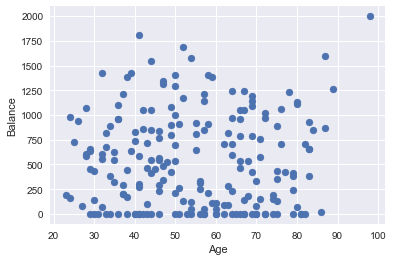

In [567]:
plt.scatter(train_set['Age'],train_set['Balance'])
plt.ylabel('Balance')
plt.xlabel('Age')

Text(0.5,0,'Age')

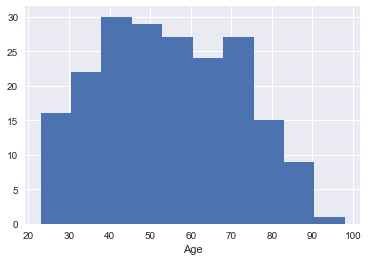

In [568]:
plt.hist(train_set['Age'])
plt.xlabel('Age')

Text(0,0.5,'Balance')

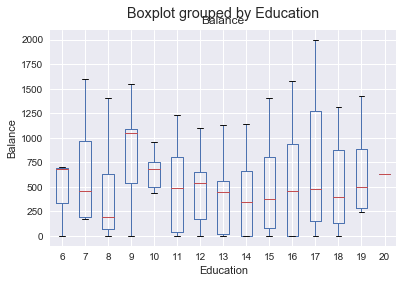

In [569]:
train_set.boxplot(column='Balance', by='Education')
plt.ylabel('Balance')

Text(0,0.5,'Balance')

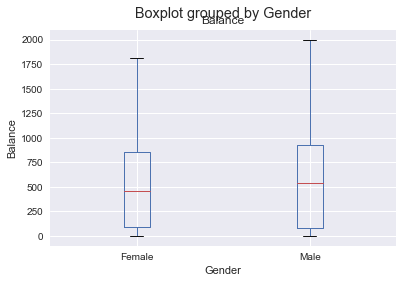

In [570]:
train_set.boxplot(column='Balance', by='Gender')
plt.ylabel('Balance')

Text(0,0.5,'Balance')

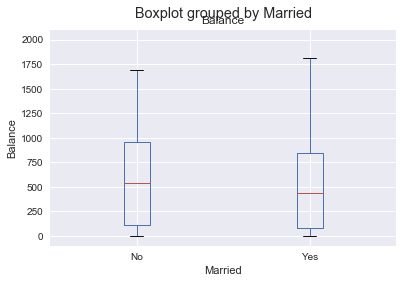

In [571]:
train_set.boxplot(column='Balance', by='Married')
plt.ylabel('Balance')

Text(0,0.5,'Balance')

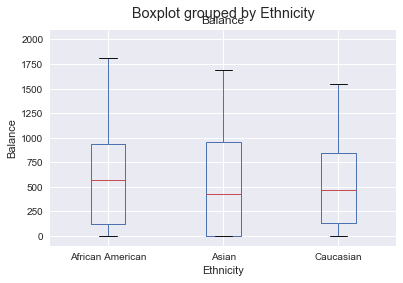

In [572]:
train_set.boxplot(column='Balance', by='Ethnicity')
plt.ylabel('Balance')

### Implications of the exploration for the regression analysis: from the plots we can see that "Limit" and "Rating" are highly correlated predictors compared to other predictors; "Gender", "Married" and "Ethnicity" are categorical predictors; and we can spot a few outliers in the scatter plots for "Limit" and "Rating".

## Question 2c – Assumption of Normality

In [439]:
Income=[]
a=np.array(train_set[0:200]["Income"])
Income=a.reshape((200,1))

Limit=[]
a=np.array(train_set[0:200]["Limit"])
Limit=a.reshape((200,1))

Rating=[]
a=np.array(train_set[0:200]["Rating"])
Rating=a.reshape((200,1))

Cards=[]
a=np.array(train_set[0:200]["Cards"])
Cards=a.reshape((200,1))

Age=[]
a=np.array(train_set[0:200]["Age"])
Age=a.reshape((200,1))

Education=[]
a=np.array(train_set[0:200]["Education"])
Education=a.reshape((200,1))

Male=[]
a=np.array(train_set[0:200]["Gender"])
for i in range(200):
    if a[i] == 'Male':
        a[i] = 1
    else:
        a[i] = 0
Male=a.reshape((200,1))

Yes_student=[]
a=np.array(train_set[0:200]["Student"])
for i in range(200):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_student=a.reshape((200,1))

Yes_married=[]
a=np.array(train_set[0:200]["Married"])
for i in range(200):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_married=a.reshape((200,1))


Caucasian=[]
a=np.array(train_set[0:200]["Ethnicity"])
for i in range(200):
    if a[i] == 'Caucasian':
        a[i] = 1
    else:
        a[i] = 0
Caucasian=a.reshape((200,1))

African_American=[]
a=np.array(train_set[0:200]["Ethnicity"])
for i in range(200):
    if a[i] == 'African American':
        a[i] = 1
    else:
        a[i] = 0
African_American=a.reshape((200,1))


All_data=np.concatenate((Income,Limit,Rating,Cards,Age,Education,Male,Yes_student,Yes_married,Caucasian,African_American), axis=1)

In [187]:
LinearRegression_2c = LinearRegression().fit(All_data, train_set['Balance'])

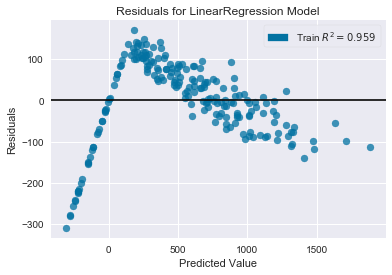

In [188]:
linear = linear_model.LinearRegression()
visualizer = ResidualsPlot(linear,hist=False)
visualizer.fit(All_data, train_set['Balance'])
visualizer.poof()

### Linear regression is not so reliable in this case because the residuals don't have constant variance. If the residuals had constant variance (e.g., they are spread out equally on both sides of 0), we would know linear regression was a good fit in this case.

## Question 2d – Variable selection

In [487]:
Income_dev=[]
a=np.array(devel_set[0:100]["Income"])
Income_dev=a.reshape((100,1))

Limit_dev=[]
a=np.array(devel_set[0:100]["Limit"])
Limit_dev=a.reshape((100,1))

Rating_dev=[]
a=np.array(devel_set[0:100]["Rating"])
Rating_dev=a.reshape((100,1))

Cards_dev=[]
a=np.array(devel_set[0:100]["Cards"])
Cards_dev=a.reshape((100,1))

Age_dev=[]
a=np.array(devel_set[0:100]["Age"])
Age_dev=a.reshape((100,1))

Education_dev=[]
a=np.array(devel_set[0:100]["Education"])
Education_dev=a.reshape((100,1))

Male_dev=[]
a=np.array(devel_set[0:100]["Gender"])
for i in range(100):
    if a[i] == 'Male':
        a[i] = 1
    else:
        a[i] = 0
Male_dev=a.reshape((100,1))

Yes_student_dev=[]
a=np.array(devel_set[0:100]["Student"])
for i in range(100):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_student_dev=a.reshape((100,1))

Yes_married_dev=[]
a=np.array(devel_set[0:100]["Married"])
for i in range(100):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_married_dev=a.reshape((100,1))

Caucasian_dev=[]
a=np.array(devel_set[0:100]["Ethnicity"])
for i in range(100):
    if a[i] == 'Caucasian':
        a[i] = 1
    else:
        a[i] = 0
Caucasian_dev=a.reshape((100,1))

African_American_dev=[]
a=np.array(devel_set[0:100]["Ethnicity"])
for i in range(100):
    if a[i] == 'African American':
        a[i] = 1
    else:
        a[i] = 0
African_American_dev=a.reshape((100,1))

All_dev=np.concatenate((Income_dev,Limit_dev,Rating_dev,Cards_dev,Age_dev,Education_dev,Male_dev,Yes_student_dev,Yes_married_dev,Caucasian_dev,African_American_dev), axis=1)

In [61]:
def subset_selection(sets, n): 
    return list(combinations(sets, n))

In [548]:
mse_scores = []
var_names = []
All_names = ['Income','Limit','Rating','Cards','Age','Education','Male','Yes_student','Yes_married','Caucasian','African_American']
All_groups_train = Income,Limit,Rating,Cards,Age,Education,Male,Yes_student,Yes_married,Caucasian,African_American
All_groups_dev = Income_dev,Limit_dev,Rating_dev,Cards_dev,Age_dev,Education_dev,Male_dev,Yes_student_dev,Yes_married_dev,Caucasian_dev,African_American_dev
for i in range(1,12):
    subset_train = subset_selection(All_groups_train,i)
    subset_dev = subset_selection(All_groups_dev,i)
    subset_names = subset_selection(All_names,i)
    for j in range(np.shape(subset_train)[0]):
        linear_regression_2d = LinearRegression().fit(np.reshape(subset_train[j],(-1,200)).T, train_set['Balance'])
        pred = linear_regression_2d.predict(np.reshape(subset_dev[j],(-1,100)).T)
        mse_scores.append(mean_squared_error(devel_set['Balance'], pred))
        var_names.append(subset_names[j])

In [549]:
min(mse_scores)

9692.8656086594929

In [550]:
len(mse_scores)

2047

In [551]:
numbers_of_i=[]
for i in range(2046):
    if mse_scores[i] == min(mse_scores):
        print(i)

1025


In [552]:
var_names[1025]

('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Yes_student')

### So, best subset selection in this case is the combination of "Income", "Limit", "Rating", "Cards", "Age" and "Student".

# QUESTION 2e – ridge regularization

In [500]:
Alpha=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10] #regularization parameter
ridge_regularization_2e = RidgeCV(alphas=Alpha,cv=5).fit(All_data, train_set['Balance']) #5-fold cross validation

In [510]:
ridge_regularization_2e.alpha_ #this is our best performed regularization parameter for ridge regression

0.10000000000000001

# Question 2f – Lasso regularization

In [503]:
lasso_regularization_2f = linear_model.LassoCV(alphas=Alpha,cv=5).fit(All_data, train_set['Balance'])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [511]:
lasso_regularization_2f.alpha_ #this is our best performed regularization parameter for lasso regression

1.0

# Question 2g – performance evaluation

In [521]:
Income_valid=[]
a=np.array(valid_set[0:100]["Income"])
Income_valid=a.reshape((100,1))

Limit_valid=[]
a=np.array(valid_set[0:100]["Limit"])
Limit_valid=a.reshape((100,1))

Rating_valid=[]
a=np.array(valid_set[0:100]["Rating"])
Rating_valid=a.reshape((100,1))

Cards_valid=[]
a=np.array(valid_set[0:100]["Cards"])
Cards_valid=a.reshape((100,1))

Age_valid=[]
a=np.array(valid_set[0:100]["Age"])
Age_valid=a.reshape((100,1))

Education_valid=[]
a=np.array(valid_set[0:100]["Education"])
Education_valid=a.reshape((100,1))

Male_valid=[]
a=np.array(valid_set[0:100]["Gender"])
for i in range(100):
    if a[i] == 'Male':
        a[i] = 1
    else:
        a[i] = 0
Male_valid=a.reshape((100,1))

Yes_student_valid=[]
a=np.array(valid_set[0:100]["Student"])
for i in range(100):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_student_valid=a.reshape((100,1))

Yes_married_valid=[]
a=np.array(valid_set[0:100]["Married"])
for i in range(100):
    if a[i] == 'Yes':
        a[i] = 1
    else:
        a[i] = 0
Yes_married_valid=a.reshape((100,1))

Caucasian_valid=[]
a=np.array(valid_set[0:100]["Ethnicity"])
for i in range(100):
    if a[i] == 'Caucasian':
        a[i] = 1
    else:
        a[i] = 0
Caucasian_valid=a.reshape((100,1))

African_American_valid=[]
a=np.array(valid_set[0:100]["Ethnicity"])
for i in range(100):
    if a[i] == 'African American':
        a[i] = 1
    else:
        a[i] = 0
African_American_valid=a.reshape((100,1))

All_data_valid=np.concatenate((Income_valid,Limit_valid,Rating_valid,Cards_valid,Age_valid,Education_valid,Male_valid,Yes_student_valid,Yes_married_valid,Caucasian_valid,African_American_valid), axis=1)

In [562]:
linear_regression_2d = LinearRegression().fit(np.concatenate((Income,Limit,Rating,Cards,Age,Yes_student), axis=1), train_set['Balance'])
pred = linear_regression_2d.predict(np.concatenate((Income_valid,Limit_valid,Rating_valid,Cards_valid,Age_valid,Yes_student_valid),axis=1))
mse_scores_validation=mean_squared_error(valid_set['Balance'], pred)
print(mse_scores_validation) #miminum mse for subset selection

10478.2469232


In [555]:
mse_scores_2e_validation = []
var_names_2e_validation = []
All_groups_valid = Income_valid,Limit_valid,Rating_valid,Cards_valid,Age_valid,Education_valid,Male_valid,Yes_student_valid,Yes_married_valid,Caucasian_valid,African_American_valid
for i in range(1,12):
    subset_train = subset_selection(All_groups_train,i)
    subset_valid = subset_selection(All_groups_valid,i)
    subset_names = subset_selection(All_names,i)
    for j in range(np.shape(subset_train)[0]):
        ridge_regularization_2e = Ridge(alpha=0.1).fit(np.reshape(subset_train[j],(-1,200)).T, train_set['Balance'])
        pred = ridge_regularization_2e.predict(np.reshape(subset_valid[j],(-1,100)).T)
        mse_scores_2e_validation.append(mean_squared_error(valid_set['Balance'], pred))
        var_names_2e_validation.append(subset_names[j])

In [556]:
min(mse_scores_2e_validation) #minimum mse for ridge

10426.692368902248

In [557]:
len(mse_scores_2e_validation)

2047

In [558]:
numbers_of_i=[]
for i in range(2047):
    if mse_scores_2e_validation[i] == min(mse_scores_2e_validation):
        print(i)

1827


In [559]:
var_names_2e_validation[1827]

('Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Male',
 'Yes_student',
 'African_American')

In [560]:
mse_scores_2f_validation = []
var_names_2f_validation = []
for i in range(1,12):
    subset_train = subset_selection(All_groups_train,i)
    subset_valid = subset_selection(All_groups_valid,i)
    subset_names = subset_selection(All_names,i)
    for j in range(np.shape(subset_train)[0]):
        lasso_regularization_2f = linear_model.Lasso(alpha=1).fit(np.reshape(subset_train[j],(-1,200)).T, train_set['Balance'])
        pred = lasso_regularization_2f.predict(np.reshape(subset_valid[j],(-1,100)).T)
        mse_scores_2f_validation.append(mean_squared_error(valid_set['Balance'], pred))
        var_names_2f_validation.append(subset_names[j])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [561]:
min(mse_scores_2f_validation) #minimum mse for lasso

10455.56490050275

In [425]:
len(mse_scores_2f_validation)

2047

In [426]:
numbers_of_i=[]
for i in range(2047):
    if mse_scores_2f_validation[i] == min(mse_scores_2f_validation):
        print(i)

1991


In [427]:
var_names_2f_validation[1991]

('Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Male',
 'Yes_student',
 'Yes_married',
 'African_American')

In [531]:
print(mse_scores_validation)
print(min(mse_scores_2e_validation))
print(min(mse_scores_2f_validation))

10478.2469232
10426.6923689
10455.5649005


### So ridge regularization works best, then lasso, then subset selection. I came to this conclusion because minumum MSE on the validation set is the smallest for ridge; it's the largest for subset selection; and it's in the middle for lasso.

# Question 2h – Interpretation of the results

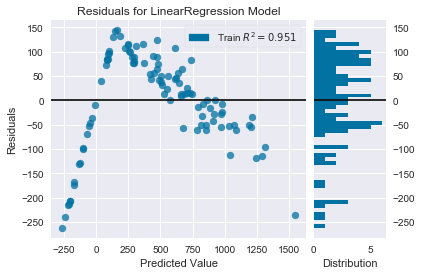

In [539]:
visualizer = ResidualsPlot(linear_regression_2d)
visualizer.fit(All_data_valid, valid_set['Balance'])
visualizer.poof()

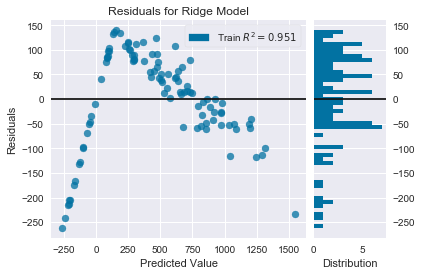

In [540]:
visualizer = ResidualsPlot(ridge_regularization_2e)
visualizer.fit(All_data_valid, valid_set['Balance'])
visualizer.poof()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


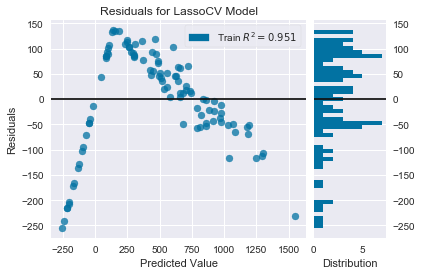

In [546]:
visualizer = ResidualsPlot(lasso_regularization_2f)
visualizer.fit(All_data_valid, valid_set['Balance'])
visualizer.poof()

### From the residual plots above, we can't really tell which model performs best. But from my answer from 2g, we know ridge performs best, then lasso, then subset selection. 

In [553]:
print(var_names[1025])
print(var_names_2e_validation[1827])
print(var_names_2f_validation[1991])

('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Yes_student')
('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Male', 'Yes_student', 'African_American')
('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Male', 'Yes_student', 'Yes_married', 'African_American')


### According to outputs above, the best predictors from subset selection are: ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student');
### best predictors from ridge regression are: ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender', 'Student', 'African_American');
### best predictors from Lasso regression are: ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender', 'Student', 'Married', 'African_American').